# SWEETSPOT CLASSIFICATION MODEL DEVELOPMENT 

In [1]:
import os

In [4]:
os.chdir(r'C:\Users\eobasi.2NCJQ13\OneDrive - University of Wyoming\Desktop\PowderRiverBasin Project work\PowderRiverSweetspots')

In [5]:
import pandas as pd 


In [6]:
df=pd.read_csv('CoredataTmax.csv')

In [8]:
df.columns 

Index(['Well', 'CRC Lib #', 'Formation', 'Sample Type', 'GR', 'ILD',
       'Porosity', 'HCl Reaction', 'Avg. Depth', 'Leco TOC (%)', 'S1 ', 'S2 ',
       'S3', 'Tmax (°C)', 'HI', 'OI', 'S1+S2', 'PI'],
      dtype='object')

In [9]:
df=df[['GR', 'ILD','Porosity','Avg. Depth','Leco TOC (%)','Tmax (°C)','PI']]

In [11]:
df.dropna(inplace=True)

C:\Users\eobasi.2NCJQ13\AppData\Local\Temp\ipykernel_10656\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9253 entries, 10 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GR            9253 non-null   float64
 1   ILD           9253 non-null   float64
 2   Porosity      9253 non-null   float64
 3   Avg. Depth    9253 non-null   float64
 4   Leco TOC (%)  9253 non-null   float64
 5   Tmax (°C)     9253 non-null   float64
 6   PI            9253 non-null   float64
dtypes: float64(7)
memory usage: 578.3 KB


In [15]:
df=df[df['Porosity']<31]
df=df[(df['Avg. Depth']>7000)&(df['ILD']<400)]
df.reset_index(inplace=True)

In [18]:
df=df[df['Leco TOC (%)']<20]

In [23]:
df=df[df['Tmax (°C)']>150]

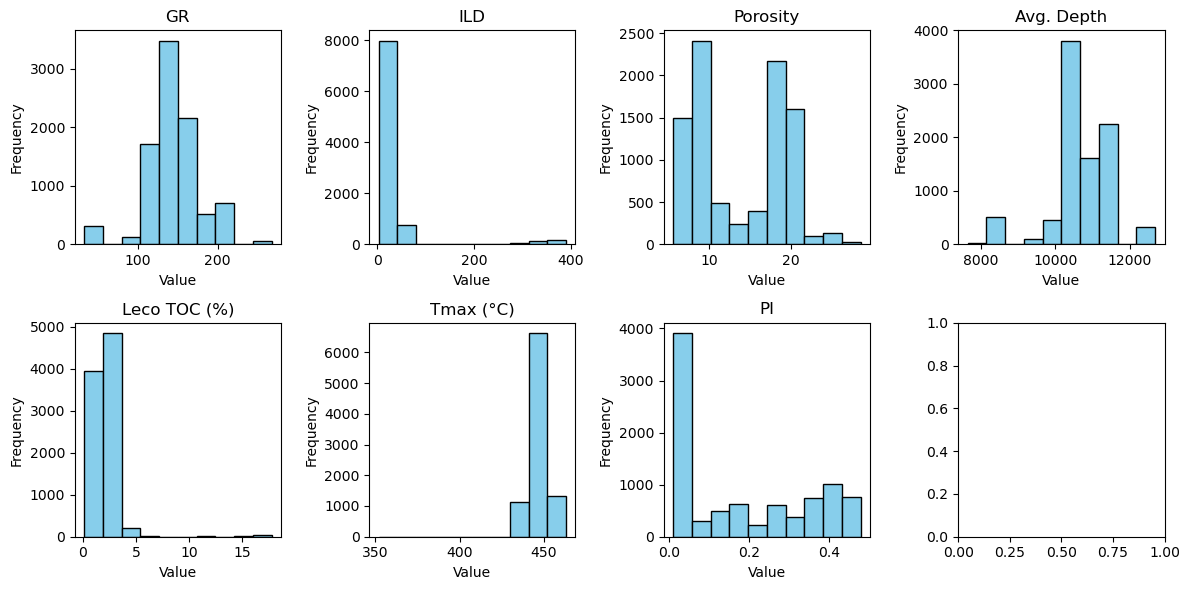

In [24]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Flatten the axs array to iterate over the subplots
axs = axs.flatten()

# Iterate over the columns and plot histograms
columns = ['GR', 'ILD', 'Porosity', 'Avg. Depth', 'Leco TOC (%)', 'Tmax (°C)', 'PI']
for i, column in enumerate(columns):
    # Select the data for the current column
    data = df[column]
    
    # Plot the histogram on the corresponding subplot
    axs[i].hist(data, bins=10, color='skyblue', edgecolor='black')
    
    # Set the title for the subplot
    axs[i].set_title(column)
    
    # Set the x-axis label
    axs[i].set_xlabel('Value')
    
    # Set the y-axis label
    axs[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
df['Tmax (°C)'].min()

352.0

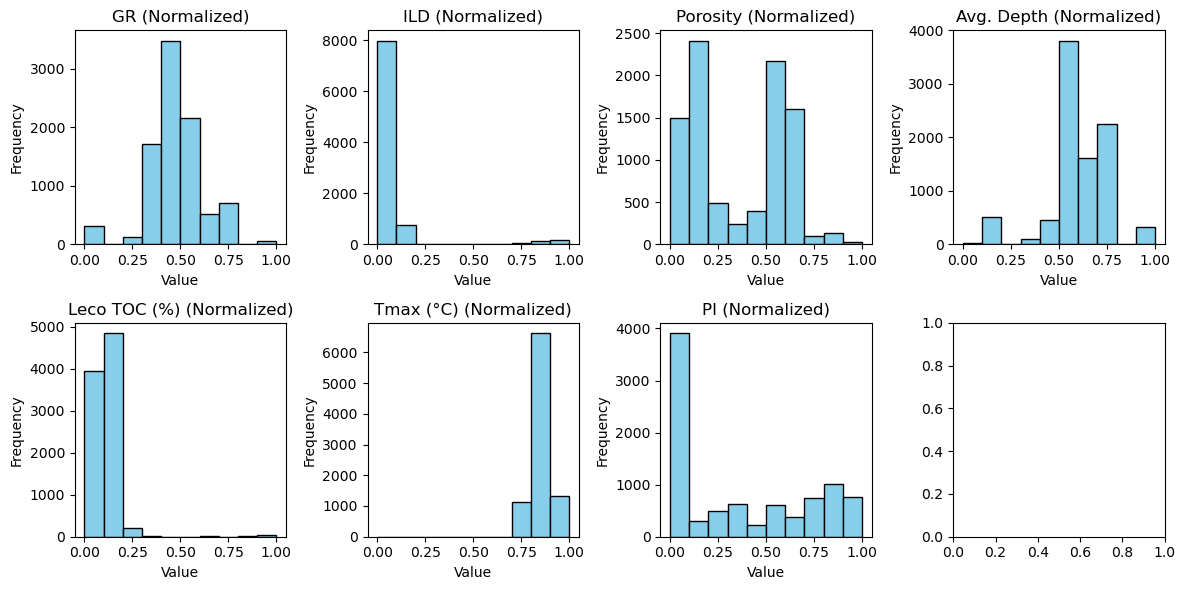

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the DataFrame for normalization
df_normalized = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize each column
for column in df.columns:
    # Skip non-numeric columns
    if not np.issubdtype(df[column].dtype, np.number):
        continue
        
    # Reshape the column values to perform normalization
    values = df[column].values.reshape(-1, 1)
    
    # Normalize the column values
    normalized_values = scaler.fit_transform(values)
    
    # Assign the normalized values back to the DataFrame
    df_normalized[column] = normalized_values.flatten()

# Create a figure and subplots with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Flatten the axs array to iterate over the subplots
axs = axs.flatten()

# Iterate over the columns and plot histograms of normalized data
for i, column in enumerate(columns):
    # Select the normalized data for the current column
    data = df_normalized[column]
    
    # Plot the histogram on the corresponding subplot
    axs[i].hist(data, bins=10, color='skyblue', edgecolor='black')
    
    # Set the title for the subplot
    axs[i].set_title(column + ' (Normalized)')
    
    # Set the x-axis label
    axs[i].set_xlabel('Value')
    
    # Set the y-axis label
    axs[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


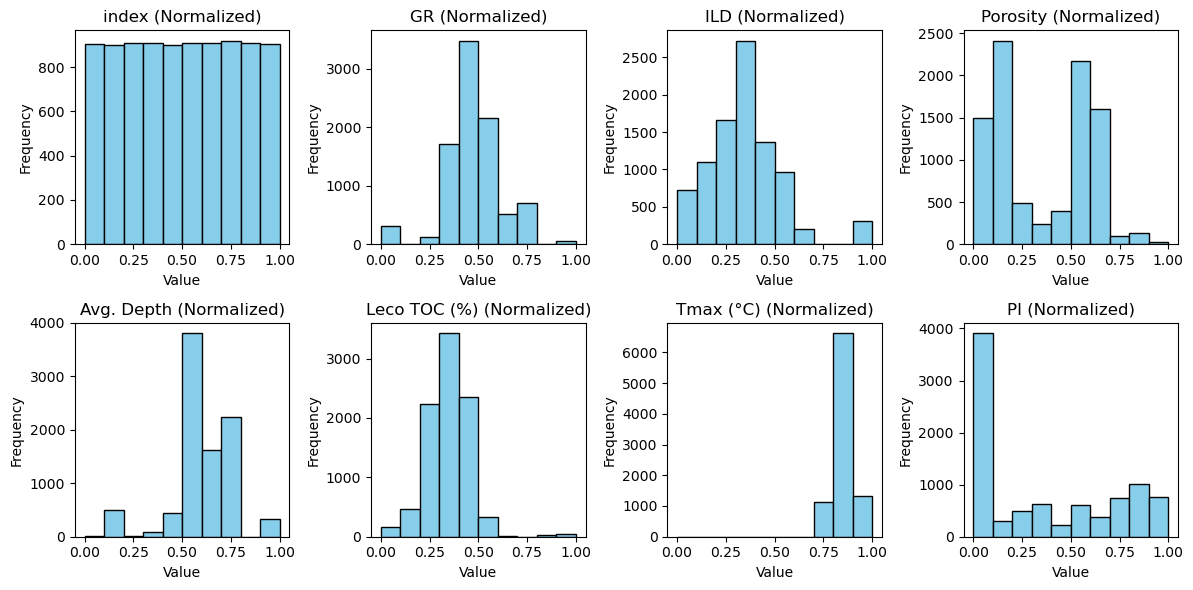

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the DataFrame for normalization and transformation
df_normalized = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply logarithmic transformation to skewed columns
df_normalized['ILD'] = np.log1p(df_normalized['ILD'])
df_normalized['Leco TOC (%)'] = np.log1p(df_normalized['Leco TOC (%)'])

# Normalize each column
for column in df_normalized.columns:
    # Skip non-numeric columns
    if not np.issubdtype(df_normalized[column].dtype, np.number):
        continue
        
    # Reshape the column values to perform normalization
    values = df_normalized[column].values.reshape(-1, 1)
    
    # Normalize the column values
    normalized_values = scaler.fit_transform(values)
    
    # Assign the normalized values back to the DataFrame
    df_normalized[column] = normalized_values.flatten()

# Create a figure and subplots with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Flatten the axs array to iterate over the subplots
axs = axs.flatten()

# Iterate over the columns and plot histograms of normalized data
for i, column in enumerate(df.columns):
    # Select the normalized data for the current column
    data = df_normalized[column]
    
    # Plot the histogram on the corresponding subplot
    axs[i].hist(data, bins=10, color='skyblue', edgecolor='black')
    
    # Set the title for the subplot
    axs[i].set_title(column + ' (Normalized)')
    
    # Set the x-axis label
    axs[i].set_xlabel('Value')
    
    # Set the y-axis label
    axs[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
df_normalized

,index,GR,ILD,Porosity,Avg. Depth,Leco TOC (%),Tmax (°C),PI
0,0.000000,0.345053,0.157563,0.635681,0.578532,0.384000,0.828829,0.021277
1,0.000501,0.388575,0.238815,0.511183,0.602403,0.260544,0.837838,0.148936
2,0.000701,0.475111,0.083129,0.125460,0.500050,0.164913,0.756757,0.255319
3,0.000901,0.362643,0.222284,0.661891,0.605044,0.374198,0.819820,0.042553
4,0.001001,0.345053,0.157563,0.635681,0.578532,0.384000,0.828829,0.021277
...,...,...,...,...,...,...,...,...
9198,0.999499,0.453967,0.467832,0.426438,0.697170,0.071788,0.873874,0.255319
9200,0.999700,0.344302,0.574049,0.178779,0.700228,0.330771,0.882883,1.000000
9201,0.999800,0.530722,0.461766,0.170060,0.734624,0.323198,0.882883,0.957447
9202,0.999900,0.475386,0.563348,0.091587,0.717208,0.416805,0.882883,0.595745


In [49]:
import pandas as pd

# Assuming df is your DataFrame
def classify_sweetspot(row):
    if row['Leco TOC (%)'] > 2.0 and row['Tmax (°C)'] > 435 and 0.1 <= row['PI'] <= 0.4:
        return 'Grade A'
    elif 1.0 <= row['Leco TOC (%)'] <= 2.0 and 435 <= row['Tmax (°C)'] <= 460 and 0.1 <= row['PI'] <= 0.4:
        return 'Grade B'
    elif 0.5 <= row['Leco TOC (%)'] <= 1.0 and 435 <= row['Tmax (°C)'] <= 460 and 0.1 <= row['PI'] <= 0.4:
        return 'Grade C'
    else:
        return 'None'

df['sweetspot'] = df.apply(classify_sweetspot, axis=1)





C:\Users\eobasi.2NCJQ13\AppData\Local\Temp\ipykernel_10656\2590024993.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sweetspot'] = df.apply(classify_sweetspot, axis=1)


In [50]:
df

,index,GR,ILD,Porosity,Avg. Depth,Leco TOC (%),Tmax (°C),PI,sweetspot
0,10,113.312000,6.419200,20.160000,10557.2,2.29,444.0,0.02,None
1,15,123.569200,9.876200,17.310000,10677.4,1.32,445.0,0.08,None
2,17,143.963500,4.226100,8.480000,10162.0,0.77,436.0,0.13,Grade C
3,19,117.457600,9.061900,20.760000,10690.7,2.20,443.0,0.03,None
4,20,113.312000,6.419200,20.160000,10557.2,2.29,444.0,0.02,None
...,...,...,...,...,...,...,...,...,...
9198,9994,138.980399,30.967158,15.370000,11154.6,0.36,449.0,0.13,None
9200,9996,113.135171,51.706493,9.700599,11170.0,1.83,450.0,0.48,None
9201,9997,157.069571,30.067157,9.500998,11343.2,1.77,450.0,0.46,None
9202,9998,144.028221,49.117105,7.704591,11255.5,2.61,450.0,0.29,Grade A


In [51]:
df.sweetspot.value_counts()

None       5830
Grade B    1697
Grade A    1263
Grade C     279
Name: sweetspot, dtype: int64

In [52]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.over_sampling import SMOTE

IndexError: index 8 is out of bounds for axis 0 with size 8

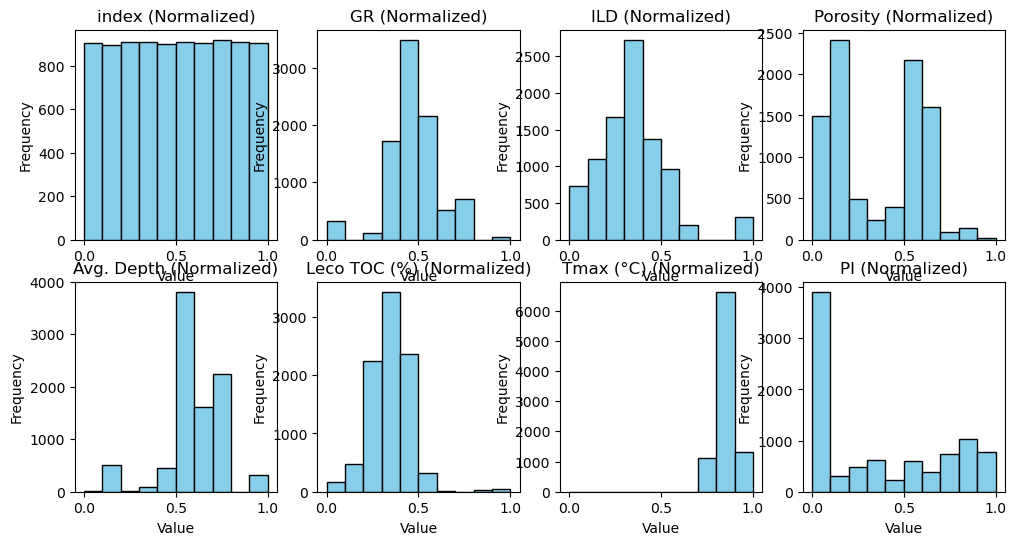

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the DataFrame for normalization and transformation
df_normalized = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply logarithmic transformation to skewed columns
df_normalized['ILD'] = np.log1p(df_normalized['ILD'])
df_normalized['Leco TOC (%)'] = np.log1p(df_normalized['Leco TOC (%)'])

# Normalize each column
for column in df_normalized.columns:
    # Skip non-numeric columns
    if not np.issubdtype(df_normalized[column].dtype, np.number):
        continue
        
    # Reshape the column values to perform normalization
    values = df_normalized[column].values.reshape(-1, 1)
    
    # Normalize the column values
    normalized_values = scaler.fit_transform(values)
    
    # Assign the normalized values back to the DataFrame
    df_normalized[column] = normalized_values.flatten()

# Create a figure and subplots with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Flatten the axs array to iterate over the subplots
axs = axs.flatten()

# Iterate over the columns and plot histograms of normalized data
for i, column in enumerate(df.columns):
    # Select the normalized data for the current column
    data = df_normalized[column]
    
    # Plot the histogram on the corresponding subplot
    axs[i].hist(data, bins=10, color='skyblue', edgecolor='black')
    
    # Set the title for the subplot
    axs[i].set_title(column + ' (Normalized)')
    
    # Set the x-axis label
    axs[i].set_xlabel('Value')
    
    # Set the y-axis label
    axs[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [57]:
df_normalized

,index,GR,ILD,Porosity,Avg. Depth,Leco TOC (%),Tmax (°C),PI,sweetspot
0,0.000000,0.345053,0.157563,0.635681,0.578532,0.384000,0.828829,0.021277,None
1,0.000501,0.388575,0.238815,0.511183,0.602403,0.260544,0.837838,0.148936,None
2,0.000701,0.475111,0.083129,0.125460,0.500050,0.164913,0.756757,0.255319,Grade C
3,0.000901,0.362643,0.222284,0.661891,0.605044,0.374198,0.819820,0.042553,None
4,0.001001,0.345053,0.157563,0.635681,0.578532,0.384000,0.828829,0.021277,None
...,...,...,...,...,...,...,...,...,...
9198,0.999499,0.453967,0.467832,0.426438,0.697170,0.071788,0.873874,0.255319,None
9200,0.999700,0.344302,0.574049,0.178779,0.700228,0.330771,0.882883,1.000000,None
9201,0.999800,0.530722,0.461766,0.170060,0.734624,0.323198,0.882883,0.957447,None
9202,0.999900,0.475386,0.563348,0.091587,0.717208,0.416805,0.882883,0.595745,Grade A


In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# First, we need to convert the categorical labels into numerical ones
le = LabelEncoder()
df_normalized['sweetspot'] = le.fit_transform(df_normalized['sweetspot'])

# Separate input features and target
y = df_normalized['sweetspot']
X = df_normalized.drop(['sweetspot','Leco TOC (%)','Tmax (°C)','PI'], axis=1)

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(y))
print('Resample dataset shape', len(y_smote))


Original dataset shape 9069
Resample dataset shape 23320


In [62]:
y_smote.value_counts()

3    5830
2    5830
0    5830
1    5830
Name: sweetspot, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Function to fit and evaluate models
def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        print(f"Model: {name}")
        print(classification_report(y_test, y_pred))

# Fit and evaluate the models
fit_and_evaluate(models, X_train, X_test, y_train, y_test)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.43      0.22      0.29      1164
           1       0.46      0.85      0.60      1146
           2       0.61      0.44      0.51      1173
           3       0.73      0.67      0.70      1181

    accuracy                           0.55      4664
   macro avg       0.56      0.55      0.52      4664
weighted avg       0.56      0.55      0.52      4664

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1164
           1       0.96      0.97      0.97      1146
           2       0.98      0.98      0.98      1173
           3       0.97      0.98      0.98      1181

    accuracy                           0.97      4664
   macro avg       0.97      0.97      0.97      4664
weighted avg       0.97      0.97      0.97      4664

Model: Random Forest
              precision    recall  f1-score   support

      

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Add the new models to the dictionary
models.update({
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
})

# Fit and evaluate the models
fit_and_evaluate(models, X_train, X_test, y_train, y_test)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.43      0.22      0.29      1164
           1       0.46      0.85      0.60      1146
           2       0.61      0.44      0.51      1173
           3       0.73      0.67      0.70      1181

    accuracy                           0.55      4664
   macro avg       0.56      0.55      0.52      4664
weighted avg       0.56      0.55      0.52      4664

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1164
           1       0.96      0.97      0.96      1146
           2       0.98      0.98      0.98      1173
           3       0.98      0.98      0.98      1181

    accuracy                           0.97      4664
   macro avg       0.97      0.97      0.97      4664
weighted avg       0.97      0.97      0.97      4664

Model: Random Forest
              precision    recall  f1-score   support

      

In [66]:
pip install --upgrade scikit-learn


     ---------------------------------------- 8.3/8.3 MB 4.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\eobasi.2NCJQ13\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [67]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Define a DataFrame to store the results
results = pd.DataFrame(columns=["Model", "Accuracy", "AUC"])

def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    best_model = None
    best_accuracy = 0
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate AUC
        auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        
        # Update the results DataFrame
        results.loc[len(results)] = [name, accuracy, auc]
        
        # Check if this model is better than the previous best
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            
    # Plot the confusion matrix for the best model
    plot_confusion_matrix(best_model, X_test, y_test)
    plt.show()

# Fit and evaluate the models
fit_and_evaluate(models, X_train, X_test, y_train, y_test)

# Print the results
print(results)


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\eobasi.2NCJQ13\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

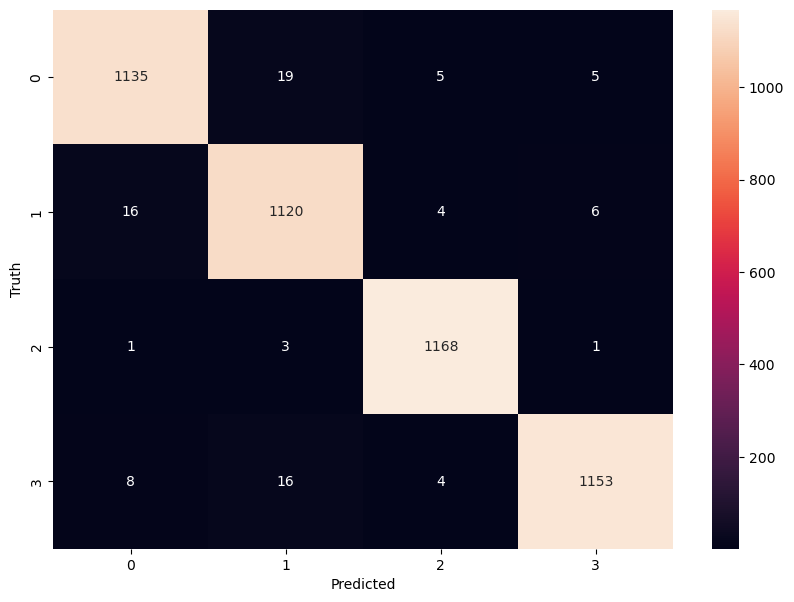

                 Model  Accuracy       AUC
0  Logistic Regression  0.545455  0.790283
1        Decision Tree  0.972341  0.981529
2        Random Forest  0.981132  0.999029
3                  SVM  0.814751  0.930554
4          Naive Bayes  0.578045  0.820164
5                  KNN  0.950257  0.990545


In [73]:
import seaborn as sns

# Define a DataFrame to store the results
results = pd.DataFrame(columns=["Model", "Accuracy", "AUC"])

def fit_and_evaluate(models, X_train, X_test, y_train, y_test):
    best_model = None
    best_accuracy = 0
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Calculate AUC
        auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        
        # Update the results DataFrame
        results.loc[len(results)] = [name, accuracy, auc]
        
        # Check if this model is better than the previous best
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            
    # Plot the confusion matrix for the best model
    cm = confusion_matrix(y_test, best_model.predict(X_test))
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

# Fit and evaluate the models
fit_and_evaluate(models, X_train, X_test, y_train, y_test)

# Print the results
print(results)


In [74]:
results

,Model,Accuracy,AUC
0,Logistic Regression,0.545455,0.790283
1,Decision Tree,0.972341,0.981529
2,Random Forest,0.981132,0.999029
3,SVM,0.814751,0.930554
4,Naive Bayes,0.578045,0.820164
5,KNN,0.950257,0.990545


In [71]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}


C:\Users\eobasi.2NCJQ13\AppData\Local\Temp\ipykernel_10656\1467681277.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


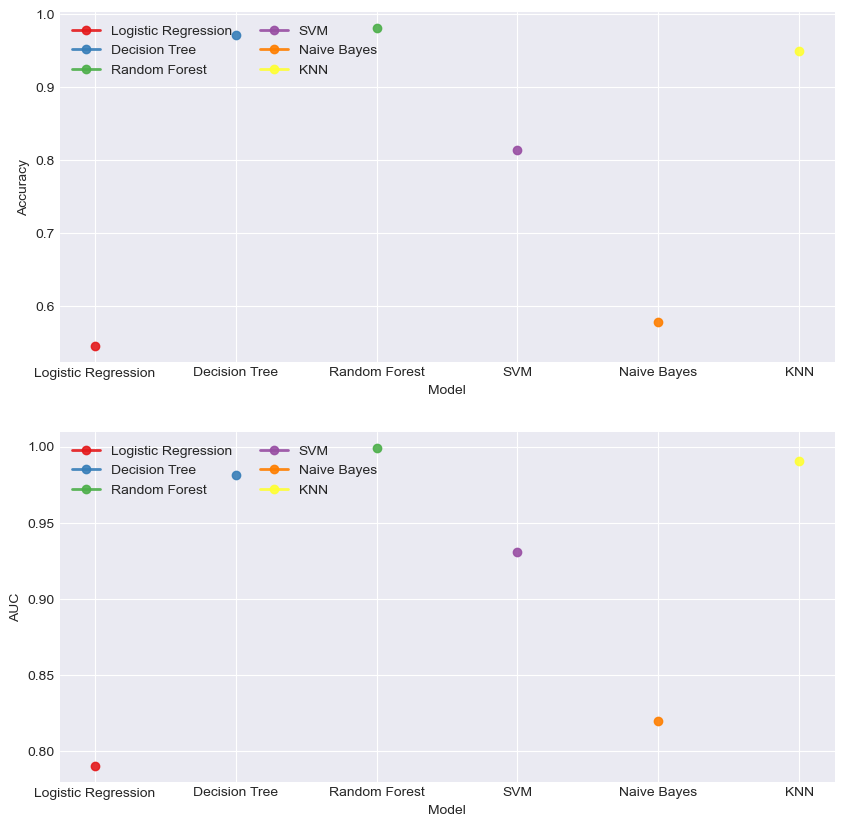

In [75]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create a color palette
palette = plt.get_cmap('Set1')

# Create a figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot accuracy
for i, model in enumerate(results['Model']):
    ax[0].plot(model, results.loc[i, 'Accuracy'], marker='o', color=palette(i), linewidth=2, alpha=0.9, label=model)

# Add legend and labels to the accuracy plot
ax[0].legend(loc=2, ncol=2)
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

# Plot AUC
for i, model in enumerate(results['Model']):
    ax[1].plot(model, results.loc[i, 'AUC'], marker='o', color=palette(i), linewidth=2, alpha=0.9, label=model)

# Add legend and labels to the AUC plot
ax[1].legend(loc=2, ncol=2)
ax[1].set_xlabel('Model')
ax[1].set_ylabel('AUC')

# Show the plot
plt.show()


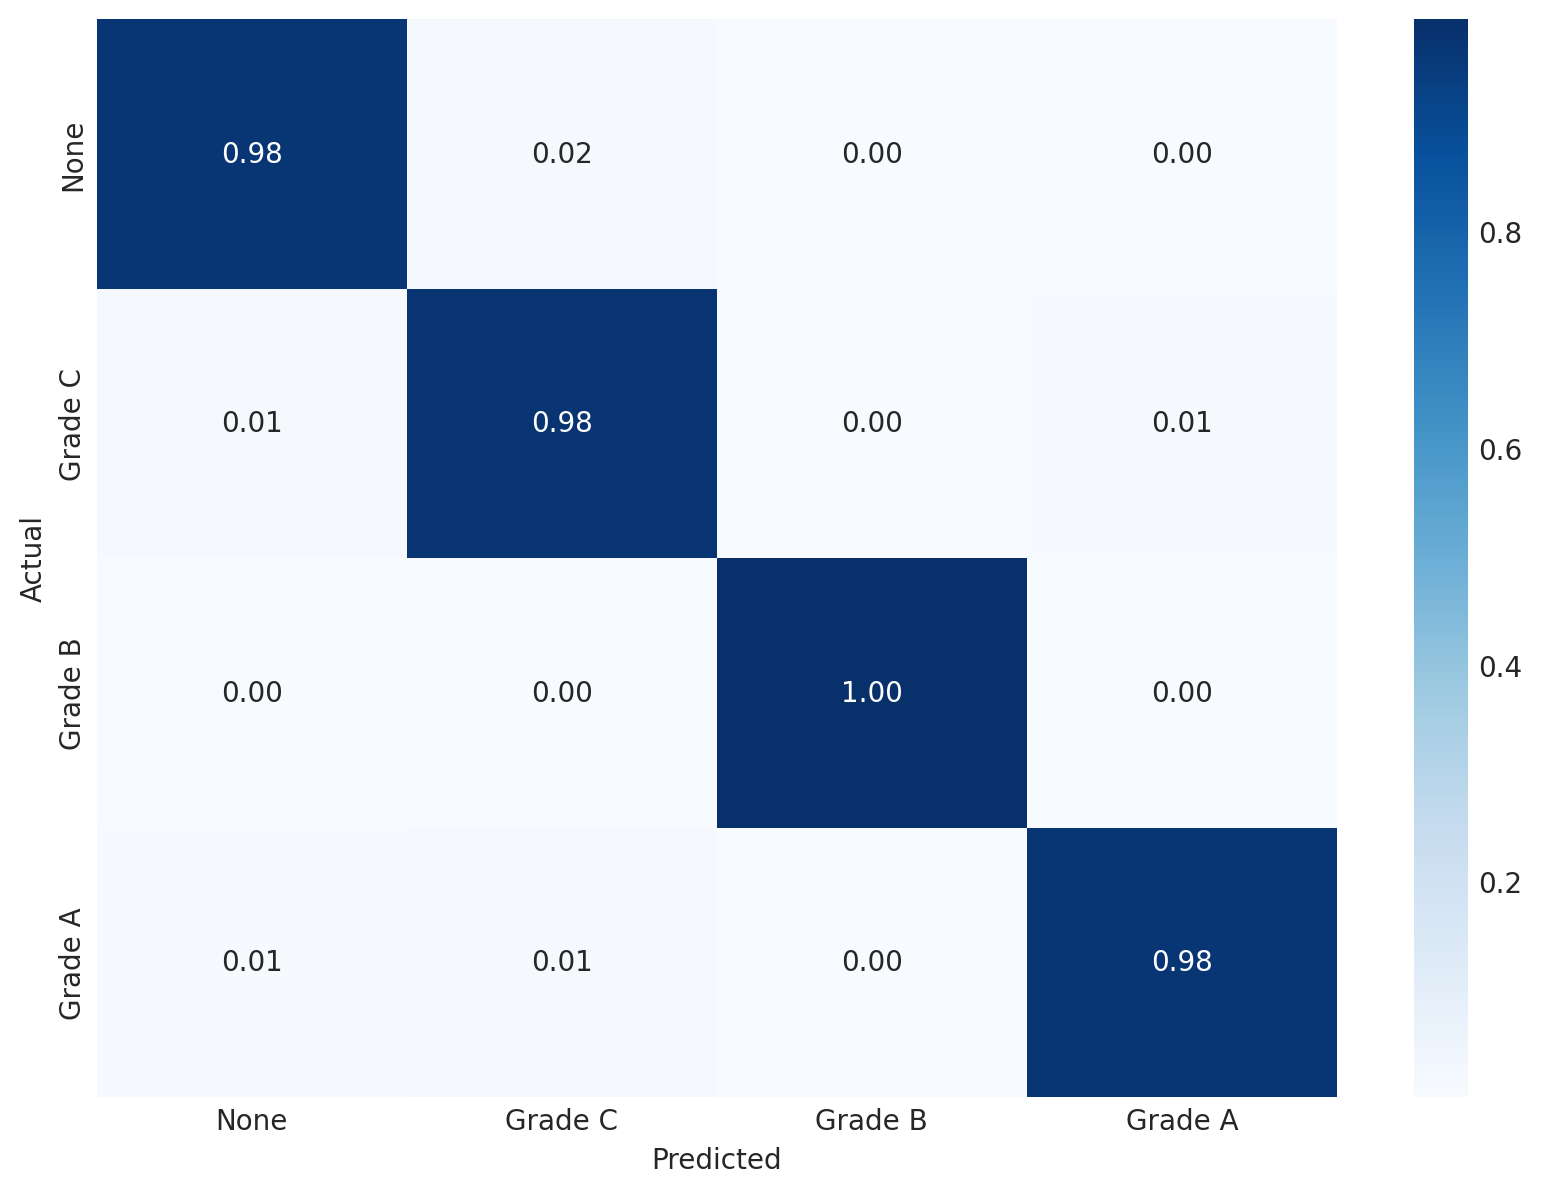

In [91]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
best_model = models['Random Forest']
# Compute confusion matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', xticklabels=['None', 'Grade C', 'Grade B', 'Grade A'], yticklabels=['None', 'Grade C', 'Grade B', 'Grade A'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
